<a href="https://colab.research.google.com/github/ReuelNixon/learn-pytorch/blob/main/01_exrcises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow Exercise

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch import nn

In [ ]:
# Setup device-agnostic code
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {DEVICE}')

Using device: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [ ]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
stop = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, stop, step).unsqueeze(dim = 1)
y = X * weight + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [ ]:
# Split the data into training and testing
split = int(0.8*len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

X_train = X_train.to(DEVICE)
y_train = y_train.to(DEVICE)
X_test = X_test.to(DEVICE)
y_test = y_test.to(DEVICE)

In [ ]:
# Plot the training and testing data
def plot_predictions(test_label = y_test.cpu(),
                     test_data = X_test.cpu(),
                     train_label = y_train.cpu(),
                     train_data = X_train.cpu(),
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c ='b', s=4, label='Train Data')
  plt.scatter(test_data, test_label, c ='g', s=4, label='Test Data')
  if predictions != None:
    plt.scatter(test_data, predictions, c ='r', s=4, label='Predictions')
  plt.legend(prop={'size':10})

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear_layer(x)


In [ ]:
# Instantiate the model and put it to the target device
model = LinearModel().to(DEVICE)
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2682]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9773], device='cuda:0'))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

In [ ]:
# Training loop

# Train model for 300 epochs
EPOCHS = 300

for epoch in range(EPOCHS):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  train_preds = model(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  train_loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    model.eval()

    with torch.inference_mode():
      # 1. Forward pass
      test_preds = model(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(test_preds, y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.065 | Test loss: 0.035
Epoch: 20 | Train loss: 0.006 | Test loss: 0.013
Epoch: 40 | Train loss: 0.009 | Test loss: 0.007
Epoch: 60 | Train loss: 0.009 | Test loss: 0.007
Epoch: 80 | Train loss: 0.009 | Test loss: 0.007
Epoch: 100 | Train loss: 0.009 | Test loss: 0.007
Epoch: 120 | Train loss: 0.009 | Test loss: 0.007
Epoch: 140 | Train loss: 0.009 | Test loss: 0.007
Epoch: 160 | Train loss: 0.009 | Test loss: 0.007
Epoch: 180 | Train loss: 0.009 | Test loss: 0.007
Epoch: 200 | Train loss: 0.009 | Test loss: 0.007
Epoch: 220 | Train loss: 0.009 | Test loss: 0.007
Epoch: 240 | Train loss: 0.009 | Test loss: 0.007
Epoch: 260 | Train loss: 0.009 | Test loss: 0.007
Epoch: 280 | Train loss: 0.009 | Test loss: 0.007


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

y_preds, loss_fn(y_preds, y_test)

(tensor([[1.1472],
         [1.1501],
         [1.1531],
         [1.1561],
         [1.1590],
         [1.1620],
         [1.1650],
         [1.1679],
         [1.1709],
         [1.1739],
         [1.1768],
         [1.1798],
         [1.1828],
         [1.1857],
         [1.1887],
         [1.1917],
         [1.1946],
         [1.1976],
         [1.2006],
         [1.2035]], device='cuda:0'),
 tensor(0.0068, device='cuda:0'))

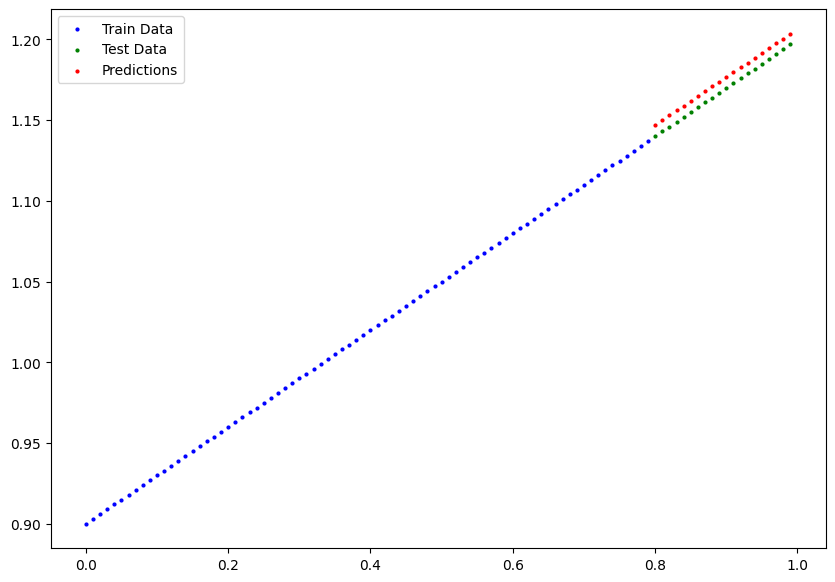

In [ ]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory
DIR_PATH = Path('models')
DIR_PATH.mkdir(parents=True, exist_ok=True)
# 2. Create model save path
MODEL_PATH = DIR_PATH / 'model.pth'
# 3. Save the model state dict
torch.save(obj = model.state_dict(), f = MODEL_PATH)

In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearModel()
loaded_model.load_state_dict(torch.load(MODEL_PATH))
loaded_model.to(DEVICE)
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2967]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9098], device='cuda:0'))])

In [ ]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()
with torch.inference_mode():
  loaded_preds = loaded_model(X_test)

loaded_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')